# One Hot Encoding using python

In this specific dataset for a survey that been conducted as demonstrated below Q4_shared_reason is the output of the check box question in the survey that are stored in one column which is an issue while doing analysis. the main analysis is being done on SPSS which solving this problem is very painful in SPSS, so to solve this problem, all the categories available should be stored as "Yes", "No" questions or in this case 1's and 0's in a column for every category.

In [112]:
import numpy as np
import pandas as pd

import pyreadstat

df, meta = pyreadstat.read_sav('/Users/hosseinhedayati/Library/CloudStorage/OneDrive-OkanaganCollege/BUAD 344/OC_survey.sav')
df.head(10)

,timestamp,Q1_status,Q2_housing_type,Q3_shared_private,Q4_shared_reason,Q5a_proximity,Q5b_transport_access,Q5c_privacy,Q5d_security,Q5e_env,...,Q8_current_loc,Q9_prefered_loc,Q10_pay_rent,Q11_rent,Q12_income,Q13_ambassador,Q14_search_platform,Q15_difficulty_search,Q16_before_after,Q17_age
0,2022/10/19 9:15:39 PM MDT,3.0,1.0,NaN,Temporarily waiting for house or apartment,3.0,4.0,3.0,5.0,4.0,...,5.0,1.0,1.0,2.0,2.0,1.0,6.0,2.0,1.0,4.0
1,2022/10/19 9:18:19 PM MDT,3.0,3.0,1.0,Providing care for a family member;Other,3.0,5.0,5.0,5.0,5.0,...,5.0,5.0,2.0,NaN,2.0,1.0,6.0,5.0,1.0,3.0
2,2022/10/19 9:24:18 PM MDT,3.0,1.0,1.0,Economic situation,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,4.0
3,2022/10/19 9:25:17 PM MDT,1.0,3.0,1.0,Other,4.0,5.0,5.0,4.0,5.0,...,5.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,3.0
4,2022/10/19 9:26:17 PM MDT,3.0,1.0,1.0,Living with partner,4.0,5.0,4.0,4.0,4.0,...,5.0,5.0,1.0,3.0,2.0,1.0,1.0,4.0,2.0,5.0
5,2022/10/19 9:26:19 PM MDT,1.0,8.0,2.0,,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,2.0,NaN,1.0,1.0,6.0,5.0,1.0,5.0
6,2022/10/19 9:28:32 PM MDT,1.0,8.0,1.0,Other,4.0,5.0,4.0,5.0,5.0,...,5.0,5.0,2.0,NaN,1.0,1.0,6.0,5.0,1.0,5.0
7,2022/10/19 9:29:12 PM MDT,2.0,4.0,1.0,Economic situation;Temporarily waiting for hou...,2.0,5.0,3.0,4.0,4.0,...,5.0,1.0,1.0,2.0,0.0,1.0,1.0,3.0,1.0,4.0
8,2022/10/19 9:29:29 PM MDT,2.0,1.0,1.0,Living with partner,4.0,5.0,2.0,4.0,4.0,...,1.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,5.0
9,2022/10/19 9:55:43 PM MDT,1.0,5.0,1.0,Economic situation;Other,5.0,5.0,5.0,4.0,5.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0


Making a new dataset to spread our one column into 7 categories and 7 column.

In [113]:
from numpy import size

size = (50,7) #size of the new dataset
q4_matrix = np.zeros(size)
q4_one_hot = pd.DataFrame(q4_matrix)
q4_one_hot.columns = ["Q4_Loss of housing", 
"Q4_Economic situation", 
"Q4_Providing care for a family member", 
"Q4_Loss of employment", 
"Q4_Temporarily waiting for house or apartment", 
"Q4_Living with partner", 
"Q4_Other"]


and the new one hot encoded data frame looks like 

In [114]:
df.head()
for i in range(0,len(df)):
    if df['Q4_shared_reason'][i]=='': 
        continue
    elif ';' not in df['Q4_shared_reason'][i]: #if its only one category stored in the cell
        q4_one_hot['Q4_'+df['Q4_shared_reason'][i]][i] = 1 #using categories for indexing
    else:
        temp=df['Q4_shared_reason'][i].split(';') #spliting the cell into seperate sell by ;
        j=0
        for j in range(len(temp)):
            q4_one_hot['Q4_'+temp[j]][i]=1
            j=+1
        
    i=+1

q4_one_hot.head(10)

,Q4_Loss of housing,Q4_Economic situation,Q4_Providing care for a family member,Q4_Loss of employment,Q4_Temporarily waiting for house or apartment,Q4_Living with partner,Q4_Other
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0


in the end with concatinating the 2 df's we have a clean one hot encoded dataframe.

In [115]:
df_ext = pd.concat([df, q4_one_hot], axis=1, join="inner")
df_ext=df_ext.drop('Q4_shared_reason', axis=1)
df_ext.head(10)

,timestamp,Q1_status,Q2_housing_type,Q3_shared_private,Q5a_proximity,Q5b_transport_access,Q5c_privacy,Q5d_security,Q5e_env,Q5f_prop_value,...,Q15_difficulty_search,Q16_before_after,Q17_age,Q4_Loss of housing,Q4_Economic situation,Q4_Providing care for a family member,Q4_Loss of employment,Q4_Temporarily waiting for house or apartment,Q4_Living with partner,Q4_Other
0,2022/10/19 9:15:39 PM MDT,3.0,1.0,NaN,3.0,4.0,3.0,5.0,4.0,5.0,...,2.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2022/10/19 9:18:19 PM MDT,3.0,3.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,...,5.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2022/10/19 9:24:18 PM MDT,3.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,2.0,...,1.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2022/10/19 9:25:17 PM MDT,1.0,3.0,1.0,4.0,5.0,5.0,4.0,5.0,5.0,...,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2022/10/19 9:26:17 PM MDT,3.0,1.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,...,4.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2022/10/19 9:26:19 PM MDT,1.0,8.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022/10/19 9:28:32 PM MDT,1.0,8.0,1.0,4.0,5.0,4.0,5.0,5.0,5.0,...,5.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,2022/10/19 9:29:12 PM MDT,2.0,4.0,1.0,2.0,5.0,3.0,4.0,4.0,5.0,...,3.0,1.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,2022/10/19 9:29:29 PM MDT,2.0,1.0,1.0,4.0,5.0,2.0,4.0,4.0,3.0,...,3.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2022/10/19 9:55:43 PM MDT,1.0,5.0,1.0,5.0,5.0,5.0,4.0,5.0,5.0,...,2.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


making a .csv to improt on SPSS to continue the analysis.

In [116]:
compression_opts = dict(method='zip',

                        archive_name='out.csv')  

df_ext.to_csv('out.zip', index=False,

          compression=compression_opts) 

In [117]:
import seaborn as sns
df_ext = df_ext.drop('timestamp',axis=1)

In [118]:
df_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Q1_status                                      48 non-null     float64
 1   Q2_housing_type                                46 non-null     float64
 2   Q3_shared_private                              49 non-null     float64
 3   Q5a_proximity                                  49 non-null     float64
 4   Q5b_transport_access                           50 non-null     float64
 5   Q5c_privacy                                    49 non-null     float64
 6   Q5d_security                                   49 non-null     float64
 7   Q5e_env                                        49 non-null     float64
 8   Q5f_prop_value                                 49 non-null     float64
 9   Q6_on_off_campus                               50 non-nu

In [119]:
Q5_mean=[]
temp_col = []
for i in df_ext.columns:
    j=1
    if "Q5" in i:
        print(i)
        temp_col.append(i)
        Q5_mean.append(np.mean(df_ext[i]))
        j=+1

Q5a_proximity
Q5b_transport_access
Q5c_privacy
Q5d_security
Q5e_env
Q5f_prop_value


In [120]:
Q7_mean=[]
temp_col = []
for i in df_ext.columns:
    j=1
    if "Q7" in i:
        print(i)
        temp_col.append(i)
        Q7_mean.append(np.mean(df_ext[i]))
        j=+1

Q7a_proximity
Q7b_transport_access
Q7c_privacy
Q7d_security
Q7e_env
Q7f_prop_value


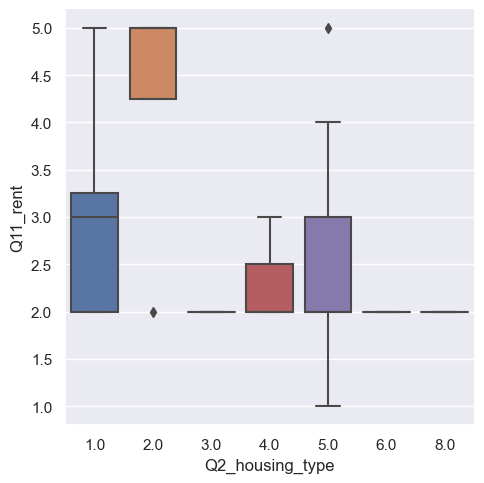

In [121]:
from scipy.stats import stats

sns.catplot(data=df_ext, x="Q2_housing_type", y="Q11_rent", kind="box")

In [122]:
df_ext_2 = df_ext[["Q8_current_loc", "Q9_prefered_loc"]].replace([1,2,3,4,5,6,7],['Kelowna Central - V1Y',
'Kelowna East - V1P','Kelowna East Central - V1X','Kelowna North - V1V','Kelowna Southwest - V1W','Kelowna West - V1Z','other'])



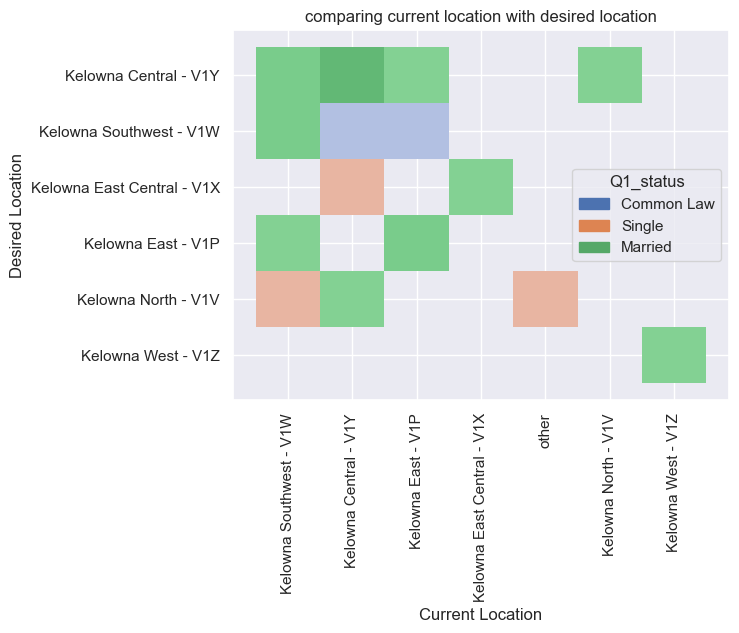

In [123]:
df_ext_3 = df_ext_2.join(df_ext["Q1_status"].replace([1,2,3],['Single',
'Married','Common Law']))


g= sns.histplot(y=df_ext_3.Q9_prefered_loc,x=df_ext_3.Q8_current_loc, hue=df_ext_3.Q1_status, multiple='stack')
g.tick_params(axis='x',rotation=90)
g.set(xlabel='Current Location', ylabel='Desired Location')
g.set_title('comparing current location with desired location')
sns.move_legend(g, "center right")

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

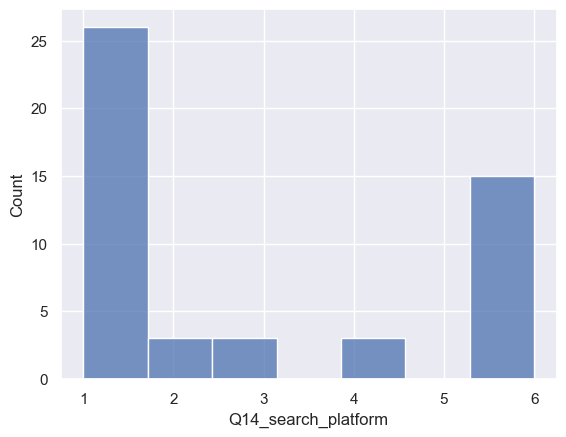

In [124]:
sns.histplot(df.Q14_search_platform)
sns.axes_style()

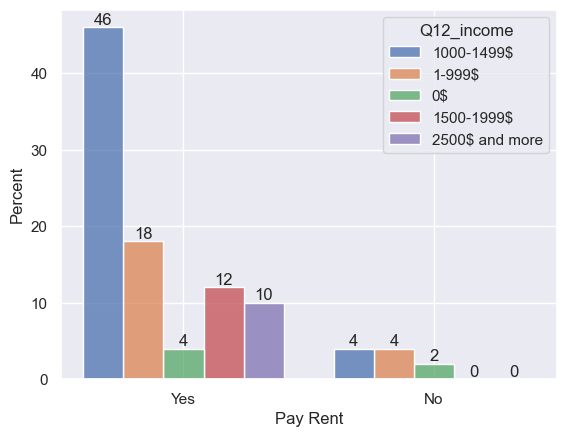

In [125]:

temp = df_ext_3.join(df_ext['Q10_pay_rent'].replace([1,2,np.nan],['Yes', 'No','No']))
sns.set_theme(style='darkgrid')
ax=sns.histplot(x=temp.Q10_pay_rent,hue=df_ext.Q12_income.replace([0,1,2,3,4,5],
    ['0$', '1-999$','1000-1499$', '1500-1999$', '2000-2499$','2500$ and more']), multiple='dodge',shrink = 0.8, stat='percent')
ax.set(xlabel='Pay Rent')
for container in ax.containers:
    ax.bar_label(container)




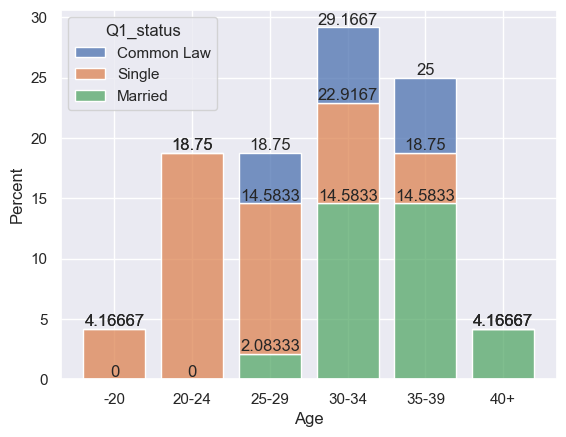

In [126]:
sns.set_theme(style='darkgrid')

df_ext.Q17_age=pd.Categorical(df_ext['Q17_age'].replace([1,2,3,4,5,6],['-20','20-24','25-29','30-34','35-39','40+']),
                        ['-20','20-24','25-29','30-34','35-39','40+'])
ax=sns.histplot(x=df_ext.Q17_age ,
            hue=temp.Q1_status, 
            multiple='stack',
            shrink = 0.8, 
            stat='percent')
ax.set(xlabel = "Age")
for container in ax.containers:
    ax.bar_label(container)

[Text(0.5, 0, 'Percent'), Text(0, 0.5, 'Current living Location')]

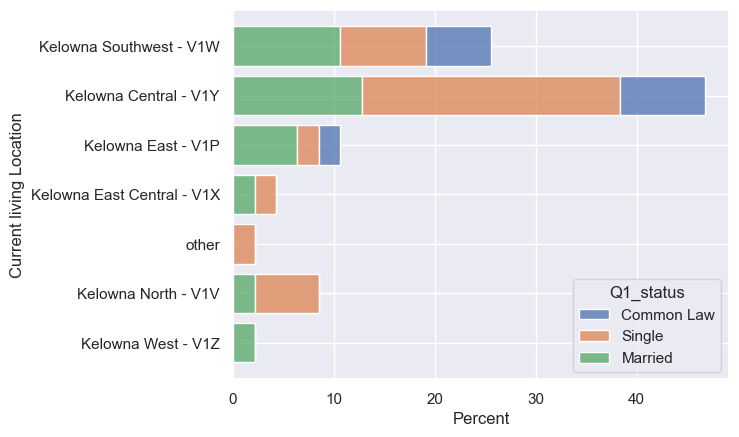

In [144]:
#df_ext.Q17_age=pd.Categorical(df_ext['Q17_age'].replace([1,2,3,4,5,6],['-20','20-24','25-29','30-34','35-39','40+']),
 #                       ['-20','20-24','25-29','30-34','35-39','40+'])
ax=sns.histplot(y=temp.Q8_current_loc ,
            hue=temp.Q1_status, 
            multiple='stack',
            shrink = 0.8, 
            stat='percent')
ax.set(xlabel = "Percent", ylabel='Current living Location')


[Text(0.5, 0, 'Percent'), Text(0, 0.5, 'Preferred Location')]

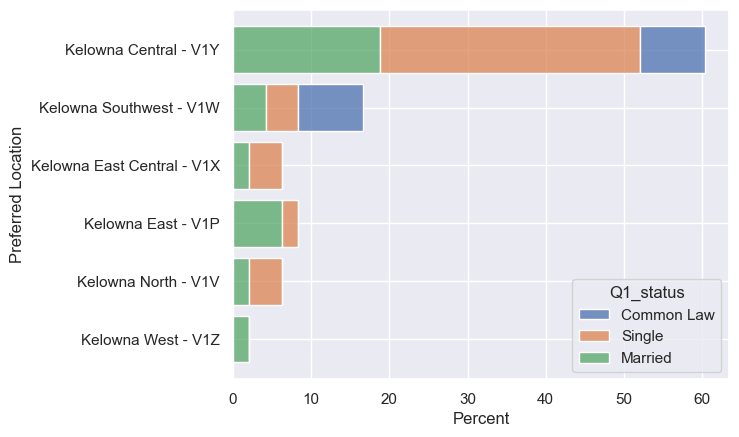

In [143]:
ax=sns.histplot(y=temp.Q9_prefered_loc ,
            hue=temp.Q1_status, 
            multiple='stack',
            shrink = 0.8, 
            stat='percent')
ax.set(xlabel = "Percent", ylabel="Preferred Location")

<AxesSubplot: xlabel='Q8_current_loc', ylabel='Q9_prefered_loc'>

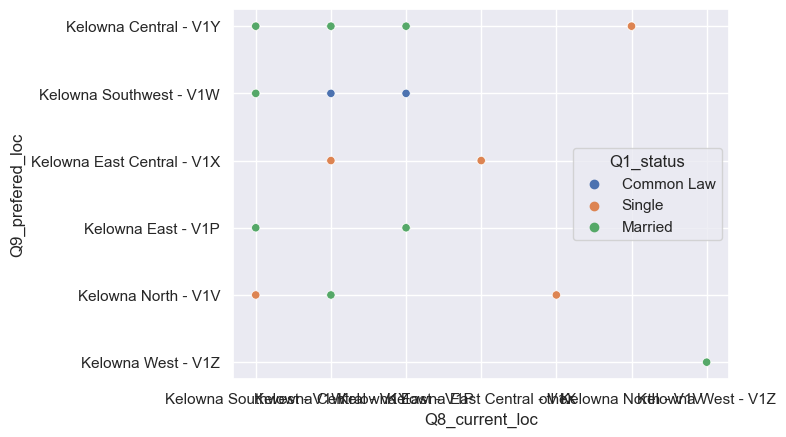

In [152]:
sns.scatterplot(temp, x="Q8_current_loc", y="Q9_prefered_loc", hue="Q1_status")

In [127]:


temp.query('Q10_pay_rent== "No"').count()/temp.query('Q10_pay_rent== "Yes"').count()*100

Q8_current_loc      9.090909
Q9_prefered_loc    11.363636
Q1_status           9.090909
Q10_pay_rent       11.111111
dtype: float64

In [128]:
temp = temp.join(df_ext.Q16_before_after.replace([1,2],['Before Arrival','After Arrival']))


/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Located Housing Befor or After arriving in BC')]

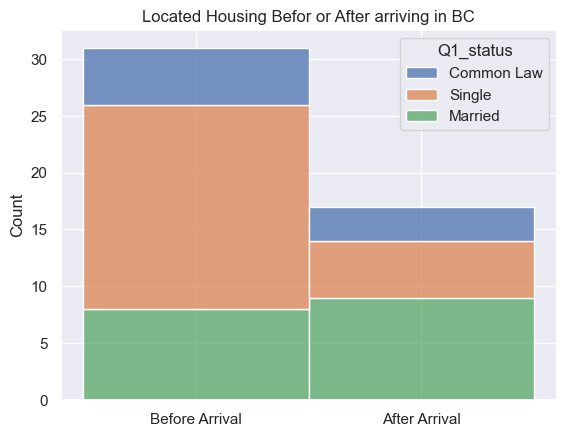

In [129]:
ax=sns.histplot(x=temp.Q16_before_after, hue=temp.Q1_status, multiple="stack")
ax.set(xlabel='', title='Located Housing Befor or After arriving in BC')


/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 0, ''), Text(0.5, 1.0, 'Preferance to live on or off campus')]

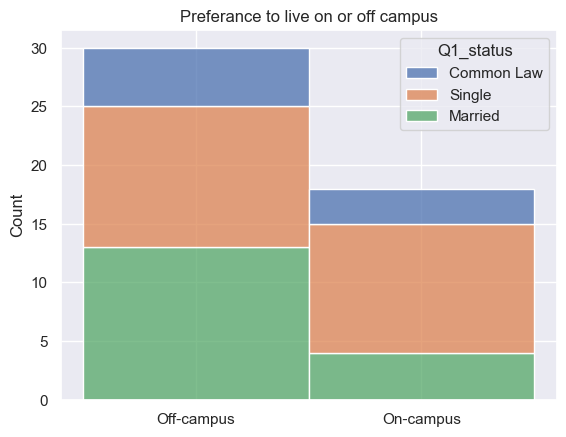

In [130]:
ax=sns.histplot(x=df_ext.Q6_on_off_campus.replace([1,2],['On-campus','Off-campus']), hue=temp.Q1_status, multiple='stack')

ax.set(xlabel='', title='Preferance to live on or off campus')

/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Preferance to live on or off campus VS age')]

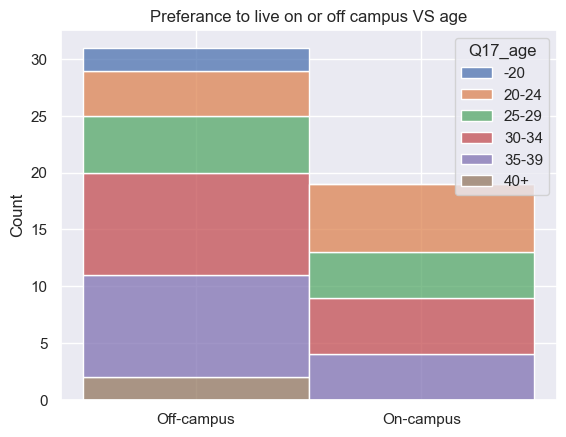

In [131]:
ax=sns.histplot(x=df_ext.Q6_on_off_campus.replace([1,2],['On-campus','Off-campus']), 
    hue=df_ext.Q17_age, multiple='stack')

ax.set(xlabel='', title='Preferance to live on or off campus VS age')

In [132]:
temp2=pd.crosstab(df_ext.Q17_age.replace([1,2,3,4,5,6],['under 20','20-24','25-29','30-34','35-39','40 and above']),
    df_ext.Q6_on_off_campus.replace([1,2],['On-campus','Off-campus']))

temp2

Q6_on_off_campus,Off-campus,On-campus
Q17_age,,
-20,2,0
20-24,4,6
25-29,5,4
30-34,9,5
35-39,9,4
40+,2,0


[Text(0.5, 0, 'Age Group'),
 Text(0.5, 1.0, 'Age group relationship with tendency to stay on campus')]

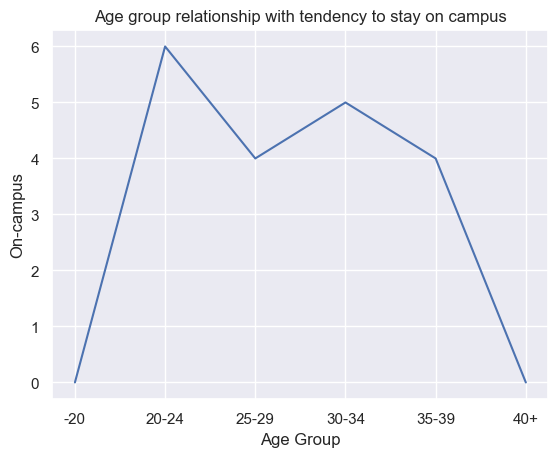

In [133]:

ax=sns.lineplot(x=temp2.index, y=temp2['On-campus'])
ax.set(xlabel="Age Group", title='Age group relationship with tendency to stay on campus')